In [1]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

Calculate and plot analytical solutions to the 1-D steady state advection-diffusion equation for the transport of heat, with constant temperature boundary conditions at z=0 and z=L.

$$\kappa {\frac {\partial ^2 T}{\partial z^2}}+ v_z\frac{\partial T}{\partial z} = 0$$

where:

* $T$ is temperature (in $^{\circ}$C)
* $z$ is depth (in m)
* $\kappa$ is thermal diffusivity (in m$^2$/s)
* $v_z$ vertical velocity (in m/s)

Step 1: Set parameters to values applicable to Earth's crust

In [6]:
# Thermal diffusivity for rocks (m^2/s)
kap=1e-6

# Depth range from surface to 30 km depth, in small steps
dz = 0.2e3
zz = numpy.arange(0, 30e3, dz)
nz = zz.size
LL = numpy.amax(zz)

# A range of vertical advection velocity values
yr2sec=3600.*24.*365.25
nv = 2
vz = numpy.zeros(nv)
# 2 mm/yr
vz[0]=2e-3/yr2sec
# 1 mm/yr
vz[1]=1e-3/yr2sec
vzcm = vz*1e2*yr2sec

# Boundary conditions:
# constant surface temperature and temperature at base of the domain 
T0=0            # surface temperature of 0 oC
TL=500          # temperature at zmax=L of 500 oC

Step 2: Compute and plot temperature solutions for the range of advection velocities

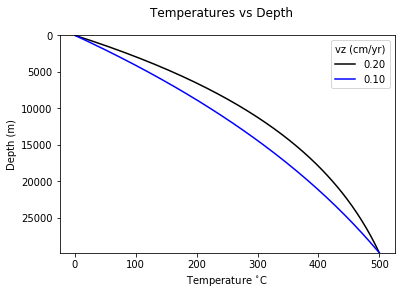

In [7]:
# Initialise set up for figure
tempfig, ax= plt.subplots(1)
tempfig.suptitle("Temperatures vs Depth")
linecol=['k-','b-','c-','g-','y-','r-','m']
ax.set_ylim(LL, 0)
plt.xlabel("Temperature $^{\circ}$C")
plt.ylabel("Depth (m)")

# Determine temperatures for each advection velocities
# and add line to figure
for iv in range(nv):
    # initialise temperature
    Tzz=numpy.zeros(nz)
    # calculate temperature for this vz
    cc=-1.*vz[iv]/kap
    prefac=TL/(1.-numpy.exp(cc*LL))
    Tzz=prefac*(1.-numpy.exp(cc*zz))
    plt.plot(Tzz,zz,linecol[iv],label=str("{:.2f}".format(vzcm[iv])))
plt.legend(title='vz (cm/yr)')
plt.show()


Step 3: Calculate Peclet numbers for these solutions

In [8]:
Pecletno=vz*LL/kap
with numpy.printoptions(precision=3, suppress=True):
    print('Advection velocity: ',vz*100*yr2sec, 'cm/yr')
    print('Peclet number: ',Pecletno)

Advection velocity:  [0.2 0.1] cm/yr
Peclet number:  [1.889 0.944]


Things you could try yourself:
* Evaluate how the profile and Peclet number change with advection velocity. At what velocity does the solution become essentially conductive?
* Add a heat production term (e.g. A = 0.4 $\mu$W/m$^3$)
* Find solution for boundary conditions: $T$($z$=0)=0 $^{\circ}$C and $\partial T/\partial z$($z$=0)=20$^{\circ}$C/km and plot for different values of $v_z$.